# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Expérience ObsInfo2307
### Comparaison labelisation humaine et chatgpt

---

# Imports

In [1]:
cd ../..

/Volumes/Geek/Work/Patat


In [2]:
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

# Chargement Données

### Annotations Manuelles

In [3]:
import patat.util.gsheet

gs = patat.util.gsheet.GoogleSheet()

sheet_id = '1bEXdqyD7so-xm54_k-FMZchVVIcO8HjPSY1mA-wGW-w'
range_name = 'Data'

df_obsinfo = gs.read_df(sheet_id,range_name)

In [4]:
labels = [
    'infox',
    'lieux, dates et personnes',
    'faits',
    'opinions',
    'subjectif',
    'propos rapporté',
    'sources citées',
    'fausse nouvelle',
    'insinuation',
    'exagération',
    'titre décalé',
]

In [5]:
import numpy as np

In [6]:
def normalize(x):
    if x == '0':
        return 0.0
    elif x== '1':
        return 1.0
    else:
        return np.NaN

In [7]:
for label in labels:
    df_obsinfo[label]=df_obsinfo[label].apply(normalize)

In [8]:
df_obsinfo['url_h'] = df_obsinfo['url_labelizer'].apply(lambda s: s[-40:])

### Annotations ChatGpt

In [9]:
import patat.util.gsheet

gs = patat.util.gsheet.GoogleSheet()

sheet_id = '1cfuBc61rK7BlNog19Aq7atqlau8GfV8a3B3b5QzH8Xs'
range_name = 'Annotations'

df_gpt = gs.read_df(sheet_id,range_name)

In [10]:
for label in labels:
    df_gpt[label]=df_gpt[label].apply(normalize)

In [11]:
df_gpt['url_h'] = df_gpt['url_labelizer'].apply(lambda s: s[-40:])

# Moyennes et accords

In [12]:
df_mean = df_obsinfo.pivot_table(index='url_h',values=labels,aggfunc='mean')

In [13]:
df_accord = df_mean.apply(lambda x : abs(2*x-1))

In [14]:
df_accord['sum']=df_accord[labels].apply(sum)

In [16]:
df_accord

,exagération,faits,fausse nouvelle,infox,insinuation,"lieux, dates et personnes",opinions,propos rapporté,sources citées,subjectif,titre décalé,sum
url_h,,,,,,,,,,,,
03421f2a299defdad375ed0cdc406f51f04b4432,0.333333,1.000000,0.333333,1.000000,1.000000,1.000000,0.777778,0.777778,1.000000,1.000000,1.000000,NaN
0552561b3c46f64febfbc3a77c301f085a98b966,1.000000,1.000000,1.000000,1.000000,1.000000,0.777778,1.000000,0.555556,1.000000,1.000000,1.000000,NaN
05e64933166d209c18233ba8970a65f578732cc4,0.555556,0.777778,0.555556,0.555556,0.111111,0.555556,0.555556,0.555556,0.555556,1.000000,0.777778,NaN
0633ca2c900b4c3a7bdd9d3228dd9716ba44920c,0.000000,0.111111,0.333333,0.250000,0.250000,0.111111,0.777778,0.777778,0.111111,0.777778,0.750000,NaN
0a386f54436dfb47169d1cb0557dfc37782e0824,0.111111,0.777778,0.333333,0.111111,0.111111,0.555556,1.000000,1.000000,0.333333,0.333333,0.777778,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
f236dfa94a48623ad448ffa4e58266480b213e3b,0.555556,1.000000,0.333333,0.333333,0.111111,1.000000,1.000000,0.555556,1.000000,1.000000,1.000000,NaN
f2654cd190c3c9cbd663d735bf3352e813597066,1.000000,1.000000,0.111111,0.777778,0.111111,1.000000,0.555556,0.555556,1.000000,0.111111,0.777778,NaN
f72f7386954cf484505760c40e4948f8f274f0df,0.555556,1.000000,1.000000,1.000000,0.333333,1.000000,0.777778,0.555556,1.000000,0.555556,1.000000,NaN


/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: >

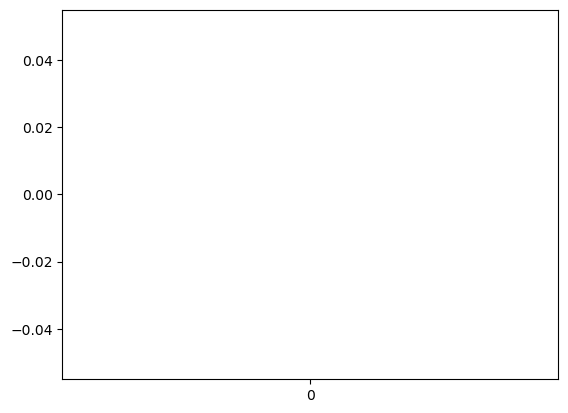

In [15]:
sns.barplot(df_accord['sum'])

## Performances ChatGpt - Moyenne
- On ne considère que les labels pour lesquels accord >= seuil_accord.

In [ ]:
#seuil_accord = 1 # 8/8 observateurs
#seuil_accord = 0.75 # 7/8 observateurs
seuil_accord = 0.50 # 6/8 observateurs
#seuil_accord = 0.25 # 5/8 observateurs
#seuil_accord = 0 # toutes observations prises en compte

In [ ]:
gpt_score = []
mean_pred = []
for index,row in df_gpt.iterrows():
    url_h=row['url_h']
    score_item = {'url_h':url_h}
    pred_item = {'url_h':url_h}
    for label in labels:
        if df_accord [label][index] >= seuil_accord:
            score_item[label]=row[label]-df_mean[label][url_h]
            pred_item[label] = round(df_mean[label][url_h])
    gpt_score.append(score_item)
    mean_pred.append(pred_item)
        

In [ ]:
df_gpt_score = pd.DataFrame(gpt_score)
df_mean_pred = pd.DataFrame(mean_pred)

In [ ]:
from sklearn import metrics

In [ ]:
results = {}
for label in labels:
    indexes = df_mean_pred[label].notna()
    y_test = df_mean_pred[label][indexes]
    y_pred = df_gpt[label][indexes]  
    results[label] = {}
    results[label]['accuracy']=metrics.accuracy_score(y_test, y_pred)
    results[label]['precision']=metrics.precision_score(y_test, y_pred)
    results[label]['f1']=metrics.f1_score(y_test, y_pred)
    results[label]['recall']=metrics.recall_score(y_test, y_pred)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred,normalize='all')
    results[label]['false_positive']=cnf_matrix[0,1]
    results[label]['false_negative']=cnf_matrix[1,0]
    results[label]['count']=len(y_test)


In [ ]:
pd.set_option('display.precision',3)

In [ ]:
df_results = pd.DataFrame(results).T
df_results

In [ ]:
plot = sns.scatterplot(df_results[['accuracy']])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [ ]:
plot = sns.scatterplot(df_results[['precision','recall']])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [ ]:
plot = sns.scatterplot(df_results[['false_positive','false_negative']])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

# Comparaisons observateurs

In [ ]:
df_obs = df_obsinfo.pivot_table(index='observateur',aggfunc='sum')[labels]

In [ ]:
df_obs = df_obs.reset_index()

In [ ]:
df_obs

In [ ]:
sns.barplot(df_obs,x='observateur',y='infox')

In [ ]:
sns.barplot(df_obs,x='observateur',y='fausse nouvelle')

## Ecarts par label

In [ ]:
df_std = pd.DataFrame(df_obs[labels].std(),columns=['std']).sort_values('std')
df_std

In [ ]:
sns.barplot(df_std.T,orient='h')

# Prochaines étapes
---

- Nombre d'accord par valeur 0/1, à comparer avec nombre moyen
- Distance entre couples d'annotateurs
- Kappa de Fleiss
- Proposer un modele d'annotation de paragraphes

# Bricolages
---